## Importing libraries

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pio
import plotly.express as px
import numpy as np
pd.set_option('display.max_columns', 50)


## Data import

In [175]:
emmisionsdata_df = pd.read_csv('/Users/user/Documents/GitHub/Bootcamp-Project-1/data/Euro_6_CLEAN.csv', encoding = 'cp1252') 

In [176]:
emmisionsdata_df.tail(5)

,Manufacturer,Model,Description,Transmission,Manual or Automatic,Engine Capacity,Fuel Type,Powertrain,Engine Power (PS),Engine Power (Kw),Electric energy consumption Miles/kWh,wh/km,Maximum range (Km),Maximum range (Miles),Euro Standard,Diesel VED Supplement,Testing Scheme,WLTP Imperial Low,WLTP Imperial Medium,WLTP Imperial High,WLTP Imperial Extra High,WLTP Imperial Combined,WLTP Imperial Combined (Weighted),WLTP Metric Low,WLTP Metric Medium,WLTP Metric High,WLTP Metric Extra High,WLTP Metric Combined,WLTP Metric Combined (Weighted),WLTP CO2,WLTP CO2 Weighted,Equivalent All Electric Range Miles,Equivalent All Electric Range KM,Electric Range City Miles,Electric Range City Km,Emissions CO [mg/km],THC Emissions [mg/km],Emissions NOx [mg/km],THC + NOx Emissions [mg/km],Particulates [No.] [mg/km],RDE NOx Urban,RDE NOx Combined,Noise Level dB(A),Date of change,Cleaned CO2
6329,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid Inscription Pro,8A-AWD,Automatic,1969.0,Electricity / Petrol,Plug-in Hybrid Electric Vehicle (PHEV),390.0,288.0,2.4,254.0,50.0,31.0,Euro 6d,False,WLTP,0.0,0.0,0.0,0.0,0.0,83.0,0.0,0.0,0.0,0.0,0.0,3.4,76.0,76.0,27.0,44.0,29.0,46.0,706.0,6.0,9.0,14.0,0.22,NaN,NaN,67.0,13-Aug-21,76.0
6330,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid R-Design,8A-AWD,Automatic,1969.0,Electricity / Petrol,Plug-in Hybrid Electric Vehicle (PHEV),390.0,288.0,2.4,254.0,50.0,31.0,Euro 6d,False,WLTP,0.0,0.0,0.0,0.0,0.0,104.5,0.0,0.0,0.0,0.0,0.0,2.7,61.0,57.0,30.0,49.0,35.0,56.0,706.0,6.0,9.0,14.0,0.22,NaN,NaN,67.0,13-Aug-21,57.0
6331,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid R-Design,8A-AWD,Automatic,1969.0,Electricity / Petrol,Plug-in Hybrid Electric Vehicle (PHEV),390.0,288.0,2.4,254.0,50.0,31.0,Euro 6d,False,WLTP,0.0,0.0,0.0,0.0,0.0,83.0,0.0,0.0,0.0,0.0,0.0,3.4,76.0,76.0,27.0,44.0,29.0,46.0,706.0,6.0,9.0,14.0,0.22,NaN,NaN,67.0,13-Aug-21,76.0
6332,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid R-Design Pro,8A-AWD,Automatic,1969.0,Electricity / Petrol,Plug-in Hybrid Electric Vehicle (PHEV),390.0,288.0,2.5,241.0,46.0,29.0,Euro 6d,False,WLTP,0.0,0.0,0.0,0.0,0.0,104.5,0.0,0.0,0.0,0.0,0.0,2.7,61.0,57.0,30.0,49.0,35.0,56.0,706.0,6.0,9.0,14.0,0.22,NaN,NaN,67.0,13-Aug-21,57.0
6333,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid R-Design Pro,8A-AWD,Automatic,1969.0,Electricity / Petrol,Plug-in Hybrid Electric Vehicle (PHEV),390.0,288.0,2.5,241.0,46.0,29.0,Euro 6d,False,WLTP,0.0,0.0,0.0,0.0,0.0,83.0,0.0,0.0,0.0,0.0,0.0,3.4,76.0,76.0,27.0,44.0,29.0,46.0,706.0,6.0,9.0,14.0,0.22,NaN,NaN,67.0,13-Aug-21,76.0


In [177]:
(emmisionsdata_df['Engine Capacity'] == 1969.0).value_counts()

False    6158
True      176
Name: Engine Capacity, dtype: int64

In [178]:
emmisionsdata_df.shape

(6334, 45)

# Local Data clean up

In [179]:
#The CSV file imported had cleaned data. 
#In this section additional data cleaning is done to for the to remove some of the remaining errors

In [180]:
#removing rows where engine power = 0
cleandata_df = emmisionsdata_df.loc[emmisionsdata_df['Engine Power (Kw)'] >= 1]

In [181]:
cleandata_df['Engine Power (Kw)'] > 0

0       True
1       True
2       True
3       True
4       True
        ... 
6329    True
6330    True
6331    True
6332    True
6333    True
Name: Engine Power (Kw), Length: 6219, dtype: bool

In [182]:
emmisionsdata_df.shape

(6334, 45)

In [183]:
emmisionsdata_df['Powertrain'].unique()

array(['Internal Combustion Engine (ICE)',
       'Plug-in Hybrid Electric Vehicle (PHEV)',
       'Battery Electric Vehicle (BEV) / Pure Electric Vehicle / Electric Vehicle (EV)',
       'Liquified Petroleum Gas (LPG)',
       'Mild Hybrid Electric Vehicle (MHEV)',
       'Hybrid Electric Vehicle (HEV)'], dtype=object)

## Plots

In [207]:
pwd

'/Users/user/Documents/GitHub/Bootcamp-Project-1'

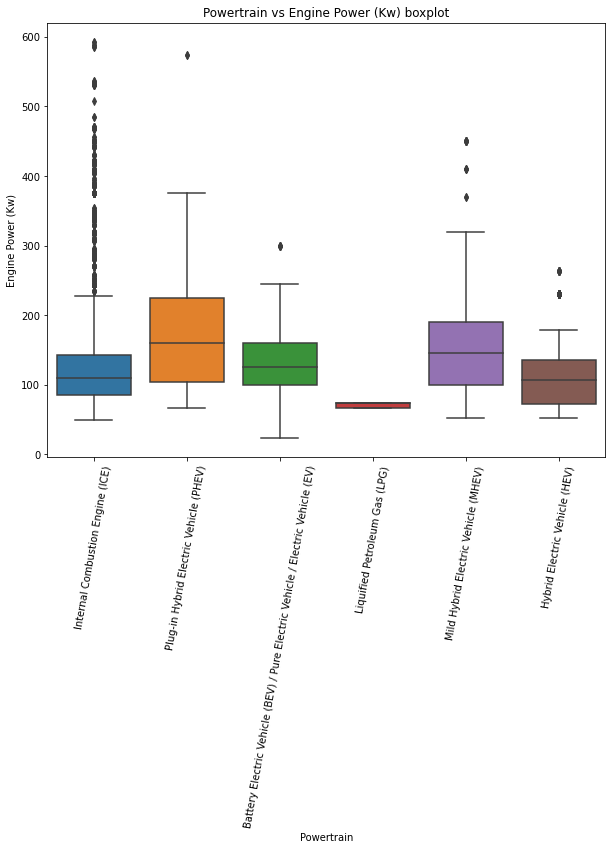

In [184]:
#boxplot to visualise the range of engine sizes based on on the Powertrain
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=cleandata_df, x="Powertrain", y="Engine Power (Kw)")
plt.xticks(rotation=80)
ax.set_title("Powertrain vs Engine Power (Kw) boxplot")
plt.show()

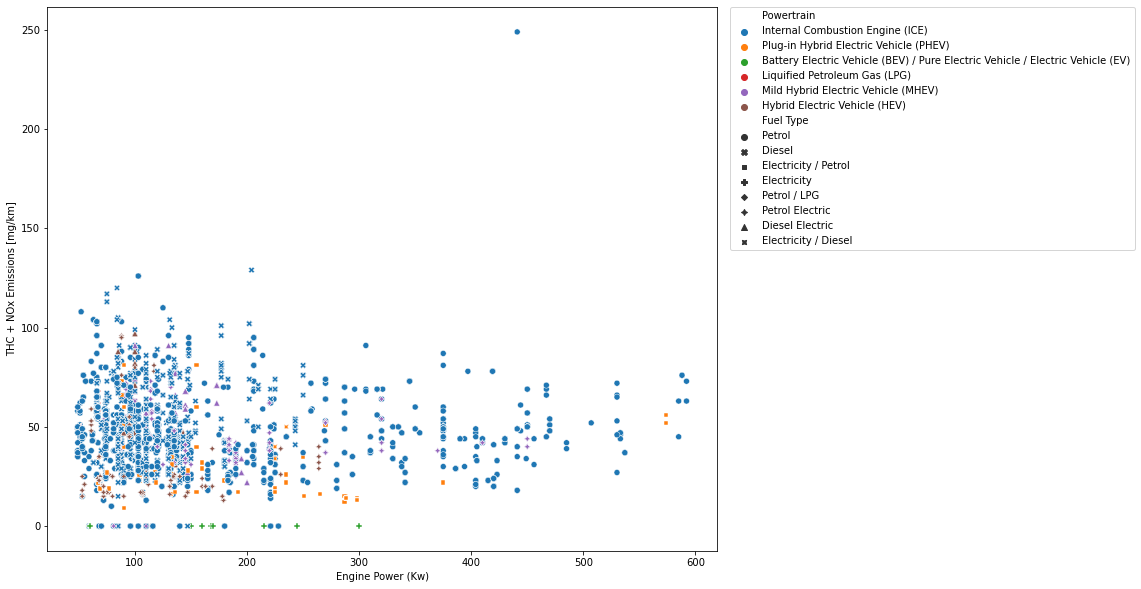

In [189]:
#Scatterplot to show effect of Engine size, Powertrain and Fuel type on NOx, THC emmisions
plt.figure(figsize=(12,10))
sns.scatterplot(data= cleandata_df, x='Engine Power (Kw)', 
                y='THC + NOx Emissions [mg/km]', hue='Powertrain', style = 'Fuel Type' )
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_title("Engine Power (Kw) vs THC + NOx Emissions [mg/km] scatterplot")
plt.show()

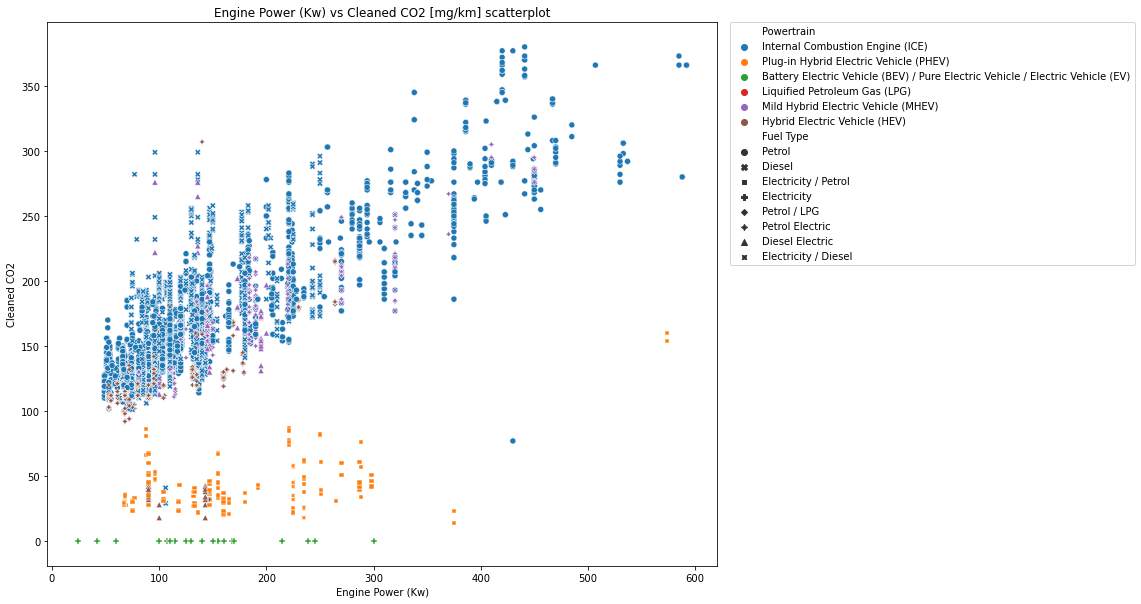

In [191]:
#Scatterplot to show effect of Engine size Powertrain and Fuel type on CO2 emmisions
plt.figure(figsize=(12,10))
ax = sns.scatterplot(data= cleandata_df, x='Engine Power (Kw)', 
                y='Cleaned CO2', hue='Powertrain', style = 'Fuel Type' )
ax.set_title = ax.set_title("Engine Power (Kw) vs Cleaned CO2 [mg/km] scatterplot")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

No handles with labels found to put in legend.


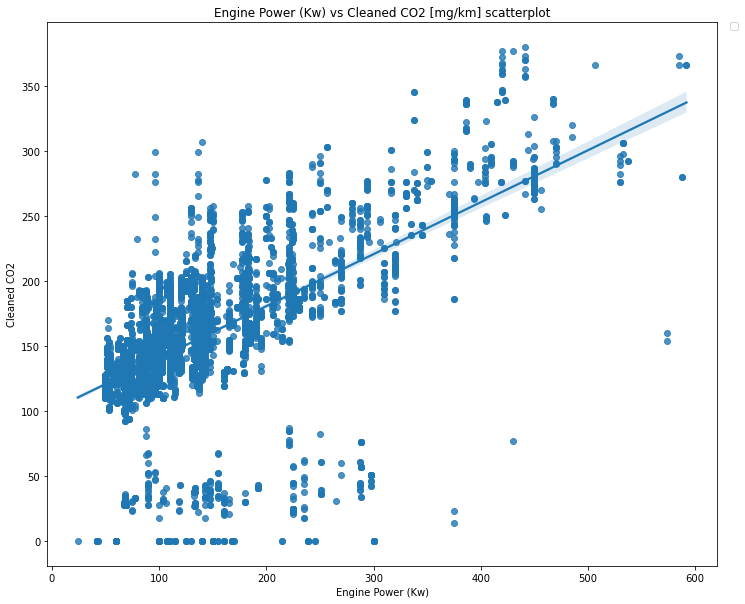

In [192]:
plt.figure(figsize=(12,10))
ax = sns.regplot(data= cleandata_df, x='Engine Power (Kw)', 
                y='Cleaned CO2')
ax.set_title = ax.set_title("Engine Power (Kw) vs Cleaned CO2 [mg/km] scatterplot")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [141]:
#Calculating mean emmisons based on the manufacturer
Manufacture_meandf = cleandata_df.groupby(['Manufacturer', 'Powertrain'], as_index=False)['Cleaned CO2'].mean()
Powertrain_meandf = pd.DataFrame(Manufacture_meandf)

In [142]:
Powertrain_meandf.head()

,Manufacturer,Powertrain,Cleaned CO2
0,ABARTH,Internal Combustion Engine (ICE),165.333333
1,ALFA ROMEO,Internal Combustion Engine (ICE),182.129412
2,ALPINE,Internal Combustion Engine (ICE),157.437500
3,ASTON MARTIN LAGONDA,Internal Combustion Engine (ICE),281.272727
4,BENTLEY MOTORS,Internal Combustion Engine (ICE),302.411765


In [143]:
Powertrain_meandf

,Manufacturer,Powertrain,Cleaned CO2
0,ABARTH,Internal Combustion Engine (ICE),165.333333
1,ALFA ROMEO,Internal Combustion Engine (ICE),182.129412
2,ALPINE,Internal Combustion Engine (ICE),157.437500
3,ASTON MARTIN LAGONDA,Internal Combustion Engine (ICE),281.272727
4,BENTLEY MOTORS,Internal Combustion Engine (ICE),302.411765
...,...,...,...
83,TOYOTA,Plug-in Hybrid Electric Vehicle (PHEV),24.625000
84,VOLVO,Battery Electric Vehicle (BEV) / Pure Electric...,0.000000
85,VOLVO,Internal Combustion Engine (ICE),169.555556
86,VOLVO,Mild Hybrid Electric Vehicle (MHEV),177.823529


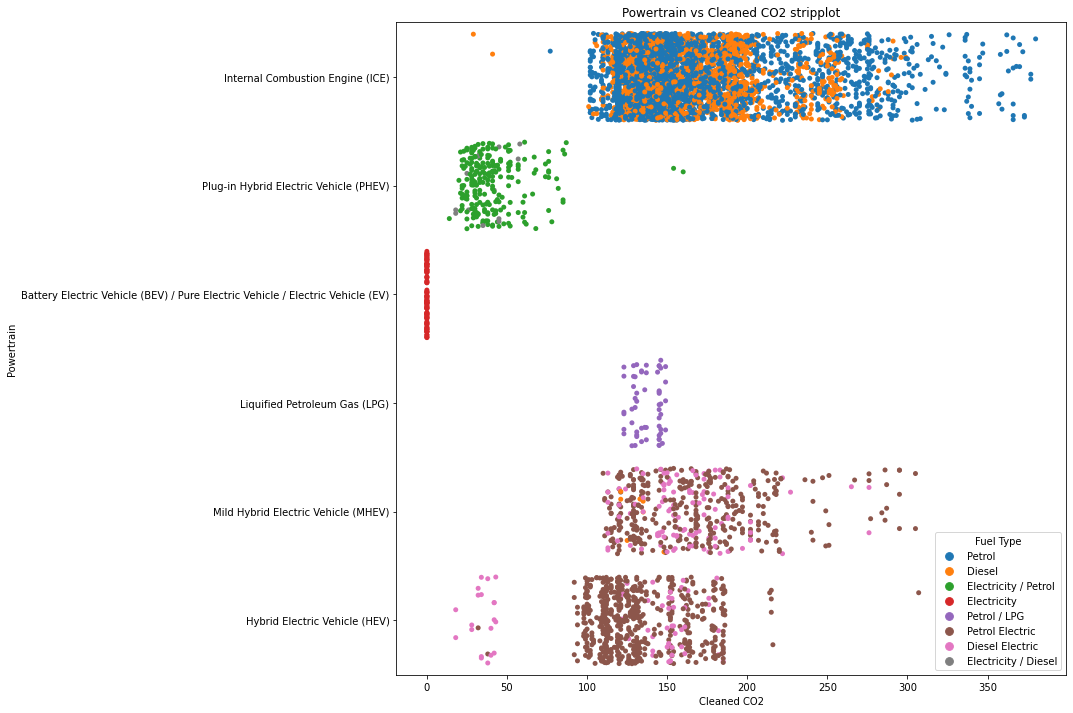

<Figure size 432x288 with 0 Axes>

In [206]:
    #This plot and the one in the next cell are very similar. 
    #The difference is tha the one below is plotted WLTP CO2 vs Powertrain, 
    # whilst the one on the next slide Cleaned CO2 is used. 
    plt.figure(figsize=(12,12))
    plt.yticks(rotation=0)
    ax = sns.stripplot(data= cleandata_df, y='Powertrain', 
                x='Cleaned CO2', jitter = 0.4, hue='Fuel Type', 
                      )
    ax.set_title("Powertrain vs Cleaned CO2 stripplot")
    plt.show()
    plt.savefig('Powertrain vs Cleaned CO2 stripplot.png')
    plt.savefig('Powertrain vs Cleaned CO2 stripplot.jpg')

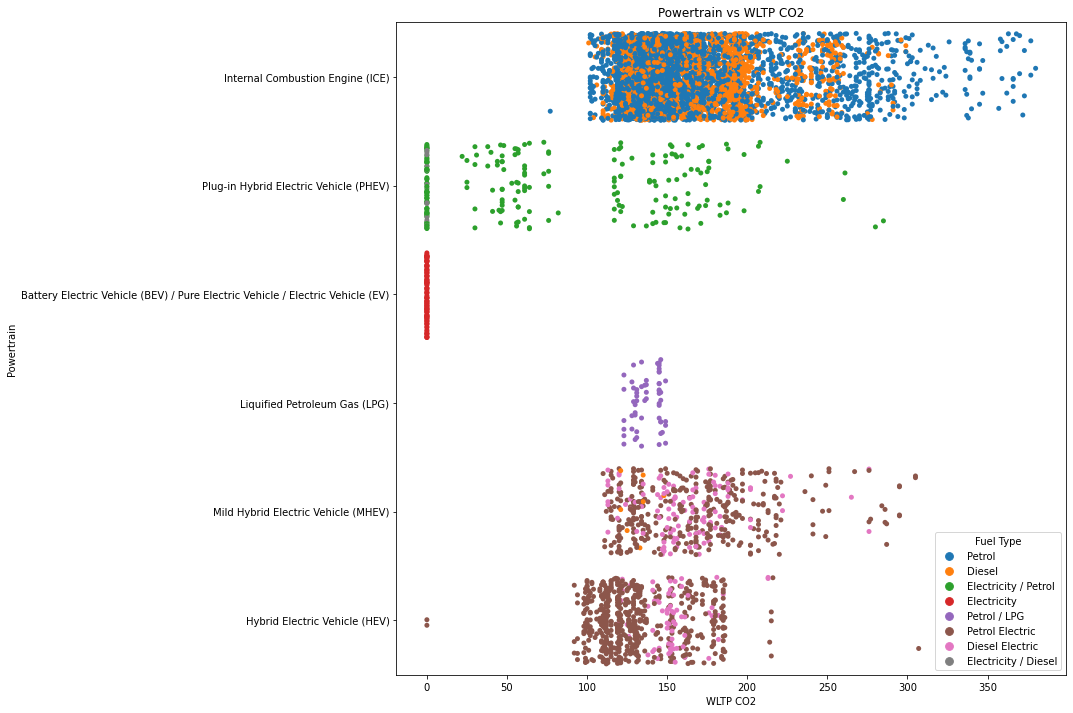

In [201]:
    # compared with the plot above the data for the PHEV does not make sense because
    # some PHEV enigines have more emissions than than ICE engines which was is not expected. 
    # Therefore the CO2 data clean up is justfied as shown on the plot above 
    plt.figure(figsize=(12,12))
    plt.yticks(rotation=0)
    ax = sns.stripplot(data= cleandata_df, y='Powertrain', 
                x='WLTP CO2', jitter = 0.4, hue='Fuel Type', 
                      )
    ax.set_title("Powertrain vs WLTP CO2")
    plt.show()

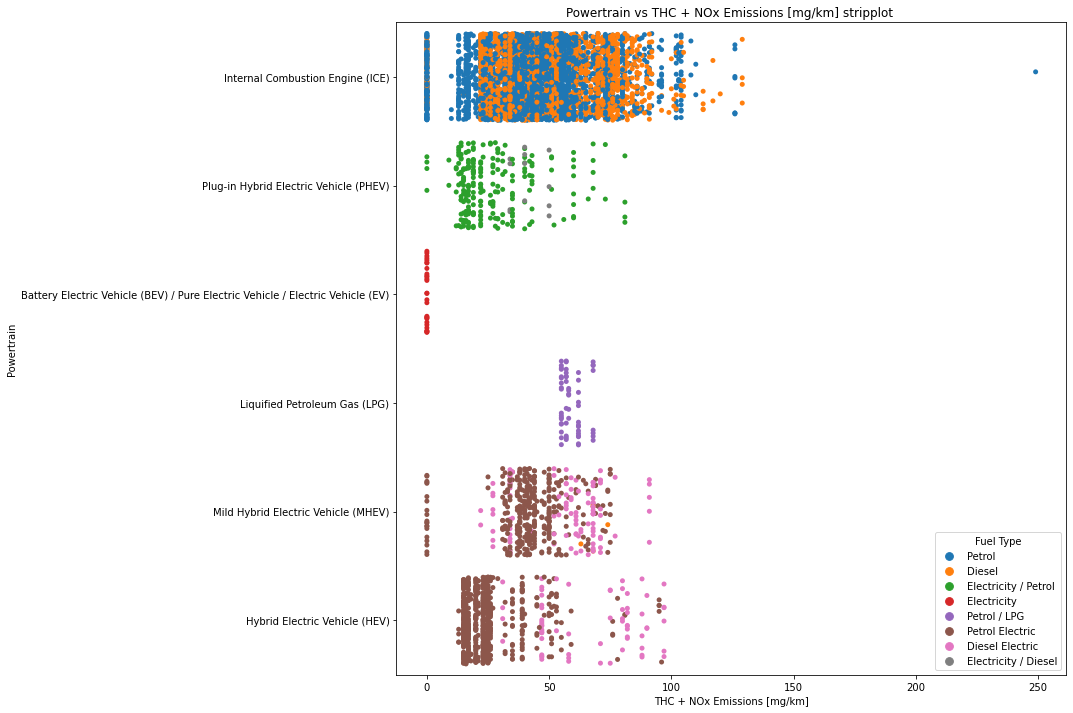

In [202]:
    plt.figure(figsize=(12,12))
    plt.yticks(rotation=0)
    ax = sns.stripplot(data= cleandata_df, y='Powertrain', 
                x='THC + NOx Emissions [mg/km]', jitter = 0.4, hue='Fuel Type'
                      )
    ax.set_title("Powertrain vs THC + NOx Emissions [mg/km] stripplot ")
    plt.show()

In [ ]:
#Scatter plots below have been plotted using plotly because it has a hover function which enables the model for 
#each data point to be determined

In [140]:
fig = px.strip(data_frame=cleandata_df, y="Cleaned CO2", x="Engine Power (Kw)", orientation="h",
               color="Fuel Type", facet_row=None, facet_col=None, hover_name= 'Model', width=None,
    height=None,log_y=False, title= 'WLTP CO2 vs Engine Power (Kw)')
fig.show()
   

In [162]:
fig2 = px.scatter(data_frame=cleandata_df, y="Cleaned CO2", x="Engine Power (Kw)", orientation="h",
               color="Fuel Type", facet_row=None, facet_col=None, hover_name= 'Model', width=None,
    height=None,log_y=False, trendline='ols', labels = 'trendline', title= 'CO2 emmisions vs Engine Power (Kw)')
fig2.show()


In [197]:
fig = px.scatter(data_frame=cleandata_df, y="THC + NOx Emissions [mg/km]", x="Engine Power (Kw)", orientation="h",
               color="Fuel Type", facet_row=None, facet_col=None,hover_data=None, hover_name= 'Model', width=None,
    height=None,log_y=None, labels = 'Powertrain', title= 'THC + NOx Emissions [mg/km] vs Engine Power (Kw)')
fig.show()
   

In [199]:
fig = px.strip(data_frame=cleandata_df, y="Emissions NOx [mg/km]", x="Engine Power (Kw)", orientation="h",
               color="Fuel Type", facet_row=None, facet_col=None,hover_data=None, hover_name= 'Model', width=None,
    height=None,log_y=None, range_y=None, title= 'Emissions NOx [mg/km] vs Engine Power (Kw)')
#fig.update_layout(yaxis_range=[0,250])
fig.show()
